### Importação dos dados



In [139]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [140]:
# Lista de datasets e nomes
lojas_dados = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Dicionário para armazenar os dados
totais_por_loja = {}

# Cálculo do faturamento total
for nome, dados in zip(nomes_lojas, lojas_dados):
    faturamento_total = dados["Preço"].sum()
    totais_por_loja[nome] = {
        "faturamento": faturamento_total
    }

# Mostra dados formatados
print(f"{'Loja':<10} {'Faturamento Total (R$)':>25}")
print("-" * 40)
for loja, info in totais_por_loja.items():
    valor_formatado = f"{info['faturamento']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    print(f"{loja:<10} R$ {valor_formatado:>17}")

Loja          Faturamento Total (R$)
----------------------------------------
Loja 1     R$      1.534.509,12
Loja 2     R$      1.488.459,06
Loja 3     R$      1.464.025,03
Loja 4     R$      1.384.497,58


# 2. Vendas por Categoria


In [141]:
# Adiciona as 3 categorias mais vendidas ao dicionário existente
for nome, dados in zip(nomes_lojas, lojas_dados):
    categorias = {}

    for categoria in dados["Categoria do Produto"]:
        if categoria in categorias:
            categorias[categoria] += 1
        else:
            categorias[categoria] = 1

    # Ordenar por quantidade e pegar as 3 mais vendidas
    top_categorias = sorted(categorias.items(), key=lambda x: x[1], reverse=True)[:3]

    # Adiciona ao dicionário já existente
    totais_por_loja[nome]["Vendas por categoria"] = dict(top_categorias)

# Mostra dados formatados
print(f"{'Loja':<8}  {'Categorias mais vendidas':>20}")
print("-" * 40)
for loja, info in totais_por_loja.items():
    valor_formatado = f"{info['faturamento']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    print(f"{loja:<10}")
    for categoria, qtd in info["Vendas por categoria"].items():
        print(f"    - {categoria}: {qtd} vendas")
    print()




Loja      Categorias mais vendidas
----------------------------------------
Loja 1    
    - moveis: 465 vendas
    - eletronicos: 448 vendas
    - brinquedos: 324 vendas

Loja 2    
    - moveis: 442 vendas
    - eletronicos: 422 vendas
    - brinquedos: 313 vendas

Loja 3    
    - moveis: 499 vendas
    - eletronicos: 451 vendas
    - brinquedos: 315 vendas

Loja 4    
    - moveis: 480 vendas
    - eletronicos: 451 vendas
    - brinquedos: 338 vendas



# 3. Média de Avaliação das Lojas

In [142]:
# Adiciona a média das avaliações ao dicionário já existente
for nome, dados in zip(nomes_lojas, lojas_dados):
    avaliacoes = dados["Avaliação da compra"]
    media_avaliacao = avaliacoes.mean()

    totais_por_loja[nome]["Média de Avaliação"] = round(media_avaliacao, 2)

# Mostra dados formatados
print(f"{'Loja':<10} {'Faturamento Total (R$)':>25} {'Média Avaliação':>20}")
print("-" * 60)
for loja, info in totais_por_loja.items():
    valor_formatado = f"{info['faturamento']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    media = f"{info['Média de Avaliação']:.2f}".replace(".", ",")
    print(f"{loja:<10} R$ {valor_formatado:>17} {media:>20}")
    print()

Loja          Faturamento Total (R$)      Média Avaliação
------------------------------------------------------------
Loja 1     R$      1.534.509,12                 3,98

Loja 2     R$      1.488.459,06                 4,04

Loja 3     R$      1.464.025,03                 4,05

Loja 4     R$      1.384.497,58                 4,00



# 4. Produtos Mais e Menos Vendidos

In [143]:
# Adiciona os 2 mais e 2 menos vendidos ao dicionário existente
for nome, dados in zip(nomes_lojas, lojas_dados):
    produtos = {}

    for produto in dados["Produto"]:
        if produto in produtos:
            produtos[produto] += 1
        else:
            produtos[produto] = 1

    # Ordena os produtos pela quantidade vendida
    produtos_ordenados = sorted(produtos.items(), key=lambda x: x[1], reverse=True)

    # Seleciona os dois mais vendidos e os dois menos vendidos
    dois_mais_vendidos = produtos_ordenados[:2]
    dois_menos_vendidos = produtos_ordenados[-2:]

    # Armazena no dicionário
    totais_por_loja[nome]["2 produtos mais vendidos"] = [
        {"nome": p[0], "quantidade": p[1]} for p in dois_mais_vendidos
    ]
    totais_por_loja[nome]["2 produtos menos vendidos"] = [
        {"nome": p[0], "quantidade": p[1]} for p in dois_menos_vendidos
    ]

# Mostra dados formatados
print(f"{'Loja':<8} Produtos mais vendidos e menos vendidos")
print("-" * 70)
for loja, info in totais_por_loja.items():
    print(f"{loja:<5}")
    print("  2 produtos mais vendidos:")
    for item in info["2 produtos mais vendidos"]:
        print(f"    - {item['nome']}: {item['quantidade']} vendas")
    print("  2 produtos menos vendidos:")
    for item in info["2 produtos menos vendidos"]:
        print(f"    - {item['nome']}: {item['quantidade']} vendas")
    print()


Loja     Produtos mais vendidos e menos vendidos
----------------------------------------------------------------------
Loja 1
  2 produtos mais vendidos:
    - Micro-ondas: 60 vendas
    - TV Led UHD 4K: 60 vendas
  2 produtos menos vendidos:
    - Headset: 33 vendas
    - Celular ABXY: 33 vendas

Loja 2
  2 produtos mais vendidos:
    - Iniciando em programação: 65 vendas
    - Micro-ondas: 62 vendas
  2 produtos menos vendidos:
    - Impressora: 34 vendas
    - Jogo de tabuleiro: 32 vendas

Loja 3
  2 produtos mais vendidos:
    - Kit banquetas: 57 vendas
    - Mesa de jantar: 56 vendas
  2 produtos menos vendidos:
    - Micro-ondas: 36 vendas
    - Blocos de montar: 35 vendas

Loja 4
  2 produtos mais vendidos:
    - Cama box: 62 vendas
    - Faqueiro: 59 vendas
  2 produtos menos vendidos:
    - Guarda roupas: 34 vendas
    - Guitarra: 33 vendas



# 5. Frete Médio por Loja


In [144]:
# Adiciona o custo médio de frete ao dicionário existente
for nome, dados in zip(nomes_lojas, lojas_dados):
    fretes = dados["Frete"]
    media_frete = fretes.mean()

    totais_por_loja[nome]["Custo médio de frete"] = round(media_frete, 2)

# Mostra dados formatados
print(f"{'Loja':<10} {'Faturamento (R$)':>20} {'Avaliação Média':>20} {'Frete Médio (R$)':>20}")
print("-" * 85)

for loja, info in totais_por_loja.items():
    faturamento_formatado = f"{info['faturamento']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    avaliacao_formatada = f"{info['Média de Avaliação']:.2f}".replace(".", ",")
    frete_formatado = f"{info['Custo médio de frete']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

    print(f"{loja:<10} R$ {faturamento_formatado:>17} {avaliacao_formatada:>20} {frete_formatado:>20}")
    print()

Loja           Faturamento (R$)      Avaliação Média     Frete Médio (R$)
-------------------------------------------------------------------------------------
Loja 1     R$      1.534.509,12                 3,98                34,69

Loja 2     R$      1.488.459,06                 4,04                33,62

Loja 3     R$      1.464.025,03                 4,05                33,07

Loja 4     R$      1.384.497,58                 4,00                31,28



Mostra todos dados resumidos:

In [145]:
# Calcula a porcentagem do custo médio de frete em relação ao faturamento médio por loja
print(f"{'Loja':<10} {'Faturamento Médio (R$)':>25} {'Frete Médio (R$)':>20} {'% Frete/Faturamento':>25}")
print("-" * 80)

for nome, dados in zip(nomes_lojas, lojas_dados):
    faturamento_total = totais_por_loja[nome]["faturamento"]
    frete_medio = totais_por_loja[nome]["Custo médio de frete"]
    num_transacoes = len(dados)

    faturamento_medio = faturamento_total / num_transacoes
    proporcao_frete = (frete_medio / faturamento_medio) * 100

    # Resultados formatados
    fat_medio_fmt = f"{faturamento_medio:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    frete_medio_fmt = f"{frete_medio:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    proporcao_fmt = f"{proporcao_frete:.2f}%"

    print(f"{nome:<10} R$ {fat_medio_fmt:>17} R$ {frete_medio_fmt:>15} {proporcao_fmt:>23}")


Loja          Faturamento Médio (R$)     Frete Médio (R$)       % Frete/Faturamento
--------------------------------------------------------------------------------
Loja 1     R$            650,49 R$           34,69                   5.33%
Loja 2     R$            630,97 R$           33,62                   5.33%
Loja 3     R$            620,61 R$           33,07                   5.33%
Loja 4     R$            587,15 R$           31,28                   5.33%




**Resumo dos dados das lojas:**

In [147]:
# Mostra todos dados formatados
print(f"{'Loja':<10} {'Faturamento (R$)':>20} {'Avaliação Média':>20} {'Frete Médio (R$)':>20}")
print("-" * 85)

for loja, info in totais_por_loja.items():
    faturamento_formatado = f"{info['faturamento']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    avaliacao_formatada = f"{info['Média de Avaliação']:.2f}".replace(".", ",")
    frete_formatado = f"{info['Custo médio de frete']:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

    print(f"{loja:<10} R$ {faturamento_formatado:>17} {avaliacao_formatada:>20} {frete_formatado:>20}")

    print("  Categorias mais vendidas:")
    for categoria, qtd in info["Vendas por categoria"].items():
        print(f"    - {categoria}: {qtd} vendas")

    print("  2 produtos mais vendidos:")
    for item in info["2 produtos mais vendidos"]:
        print(f"    - {item['nome']}: {item['quantidade']} vendas")

    print("  2 produtos menos vendidos:")
    for item in info["2 produtos menos vendidos"]:
        print(f"    - {item['nome']}: {item['quantidade']} vendas")

    print()


Loja           Faturamento (R$)      Avaliação Média     Frete Médio (R$)
-------------------------------------------------------------------------------------
Loja 1     R$      1.534.509,12                 3,98                34,69
  Categorias mais vendidas:
    - moveis: 465 vendas
    - eletronicos: 448 vendas
    - brinquedos: 324 vendas
  2 produtos mais vendidos:
    - Micro-ondas: 60 vendas
    - TV Led UHD 4K: 60 vendas
  2 produtos menos vendidos:
    - Headset: 33 vendas
    - Celular ABXY: 33 vendas

Loja 2     R$      1.488.459,06                 4,04                33,62
  Categorias mais vendidas:
    - moveis: 442 vendas
    - eletronicos: 422 vendas
    - brinquedos: 313 vendas
  2 produtos mais vendidos:
    - Iniciando em programação: 65 vendas
    - Micro-ondas: 62 vendas
  2 produtos menos vendidos:
    - Impressora: 34 vendas
    - Jogo de tabuleiro: 32 vendas

Loja 3     R$      1.464.025,03                 4,05                33,07
  Categorias mais vendidas:
 




**Gráficos com as informações resumidas para análises:**

****

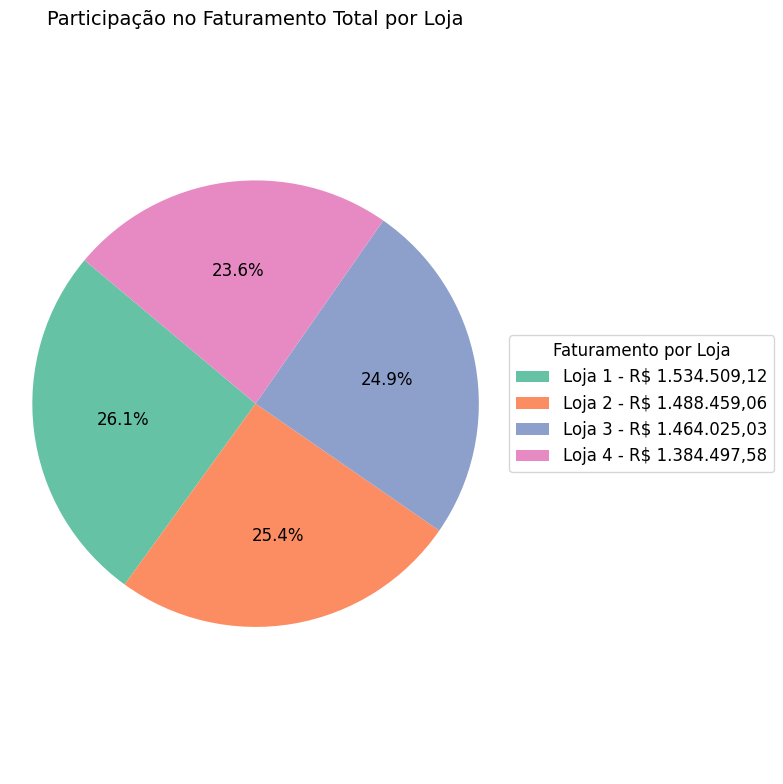

In [146]:
import matplotlib.pyplot as plt

# Dados
nomes = list(totais_por_loja.keys())
faturamentos = [info["faturamento"] for info in totais_por_loja.values()]

rotulos_formatados = [
    f"{nome} - R$ {valor:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    for nome, valor in zip(nomes, faturamentos)
]
# Criar gráfico pizza
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    faturamentos,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    textprops={'fontsize': 12}
)

plt.legend(wedges, rotulos_formatados, title="Faturamento por Loja", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Participação no Faturamento Total por Loja", loc='center', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()




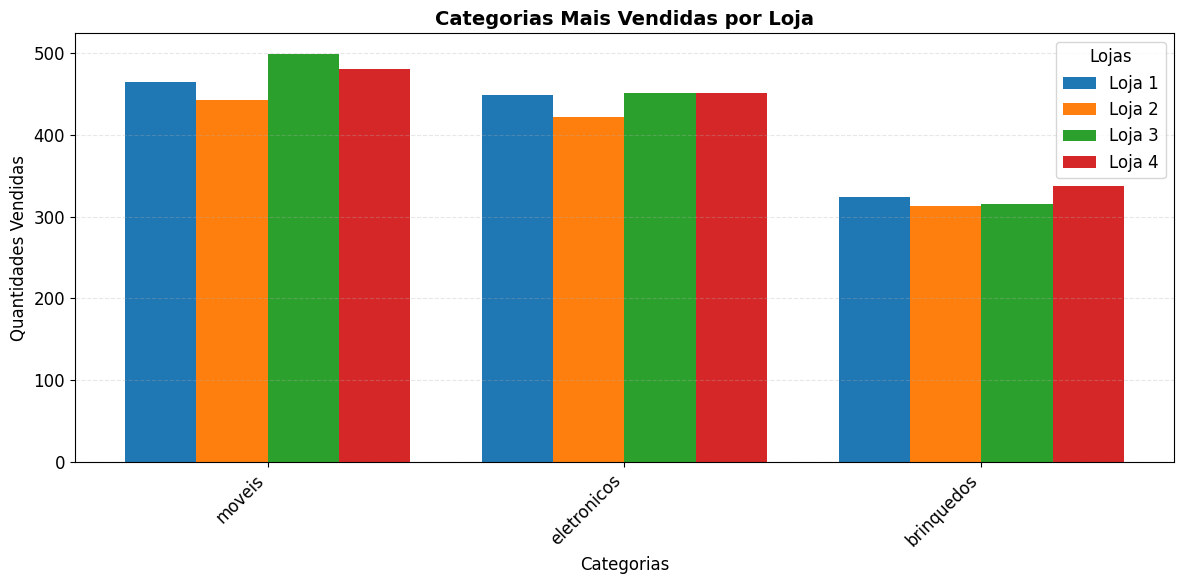

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
categorias_unicas = set()
for info in totais_por_loja.values():
    top3 = sorted(info["Vendas por categoria"].items(), key=lambda x: x[1], reverse=True)[:3]
    categorias_unicas.update([cat for cat, _ in top3])

soma_por_categoria = {}
for categoria in categorias_unicas:
    total = sum(totais_por_loja[loja]["Vendas por categoria"].get(categoria, 0) for loja in totais_por_loja)
    soma_por_categoria[categoria] = total

# Ordenar categorias
categorias_ordenadas = sorted(soma_por_categoria.items(), key=lambda x: x[1], reverse=True)
categorias_ordenadas = [cat for cat, _ in categorias_ordenadas]

dados_categorias = {categoria: [] for categoria in categorias_ordenadas}
lojas = list(totais_por_loja.keys())

for categoria in categorias_ordenadas:
    for loja in lojas:
        vendas = totais_por_loja[loja]["Vendas por categoria"]
        dados_categorias[categoria].append(vendas.get(categoria, 0))

# Criar gráfico barras
x = np.arange(len(categorias_ordenadas))
largura = 0.2
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.figure(figsize=(12, 6))

for i, loja in enumerate(lojas):
    valores = [dados_categorias[categoria][i] for categoria in categorias_ordenadas]
    plt.bar(x + i * largura, valores, width=largura, label=loja, color=cores[i])

plt.xlabel("Categorias", fontsize=12)
plt.ylabel("Quantidades Vendidas", fontsize=12)
plt.title("Categorias Mais Vendidas por Loja", fontsize=14, fontweight='bold')
plt.xticks(x + largura * (len(lojas) - 1) / 2, categorias_ordenadas, rotation=45, ha='right')
plt.legend(title="Lojas")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()





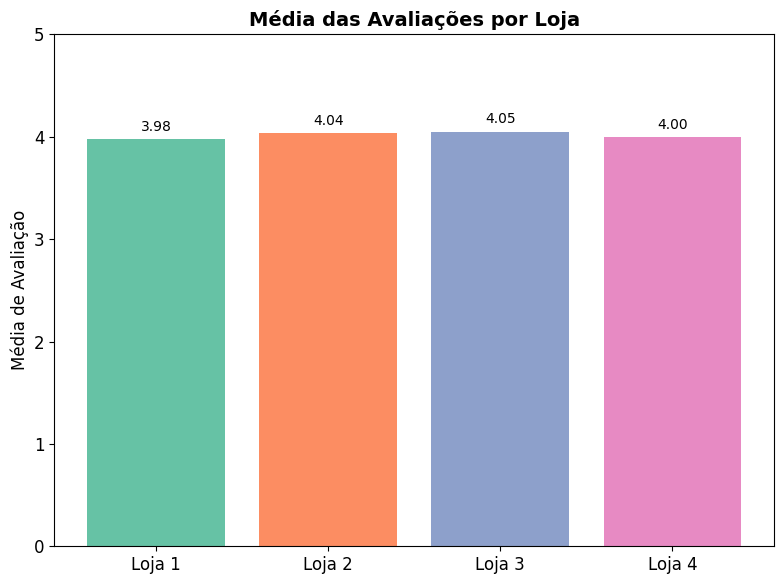

In [152]:
import matplotlib.pyplot as plt

# Dados
lojas = list(totais_por_loja.keys())
avaliacoes = [totais_por_loja[loja]["Média de Avaliação"] for loja in lojas]
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(lojas, avaliacoes, color=cores)

plt.title("Média das Avaliações por Loja", fontsize=14, fontweight='bold')
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5)

for barra, nota in zip(barras, avaliacoes):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.05,
             f"{nota:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


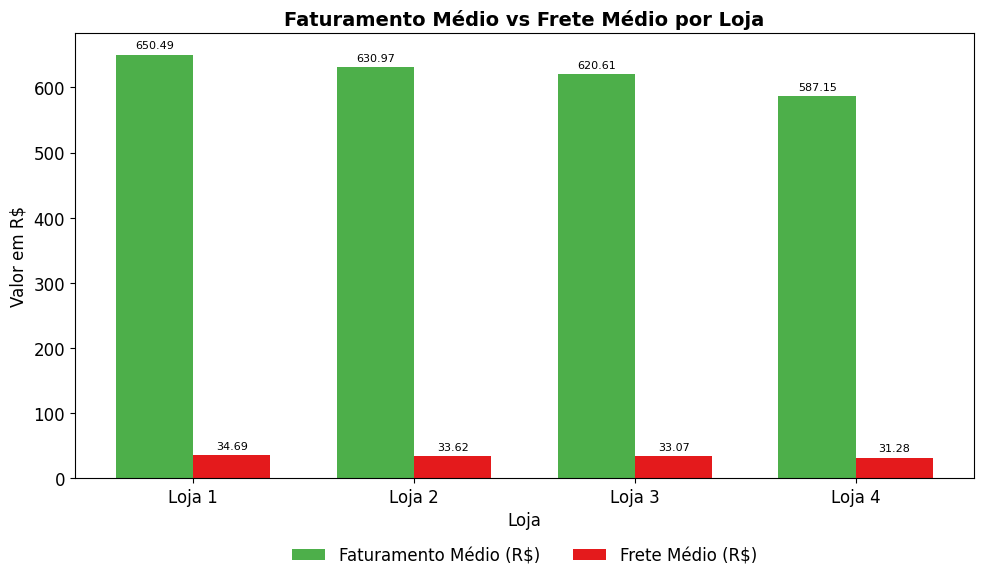

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
lojas = nomes_lojas
faturamentos_medios = []
fretes_medios = []
proporcoes_frete = []

for nome, dados in zip(nomes_lojas, lojas_dados):
    faturamento_total = totais_por_loja[nome]["faturamento"]
    frete_medio = totais_por_loja[nome]["Custo médio de frete"]
    num_transacoes = len(dados)

    faturamento_medio = faturamento_total / num_transacoes
    proporcao_frete = (frete_medio / faturamento_medio) * 100

    faturamentos_medios.append(faturamento_medio)
    fretes_medios.append(frete_medio)
    proporcoes_frete.append(proporcao_frete)

# Criar gráfico
x = np.arange(len(lojas))
largura = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
barras1 = ax.bar(x - largura/2, faturamentos_medios, largura, label='Faturamento Médio (R$)', color='#4daf4a')
barras2 = ax.bar(x + largura/2, fretes_medios, largura, label='Frete Médio (R$)', color='#e41a1c')

ax.set_title('Faturamento Médio vs Frete Médio por Loja', fontsize=14, fontweight='bold')
ax.set_xlabel('Loja')
ax.set_ylabel('Valor em R$')
ax.set_xticks(x)
ax.set_xticklabels(lojas)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

for barras in [barras1, barras2]:
    for bar in barras:
        altura = bar.get_height()
        ax.annotate(f'{altura:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


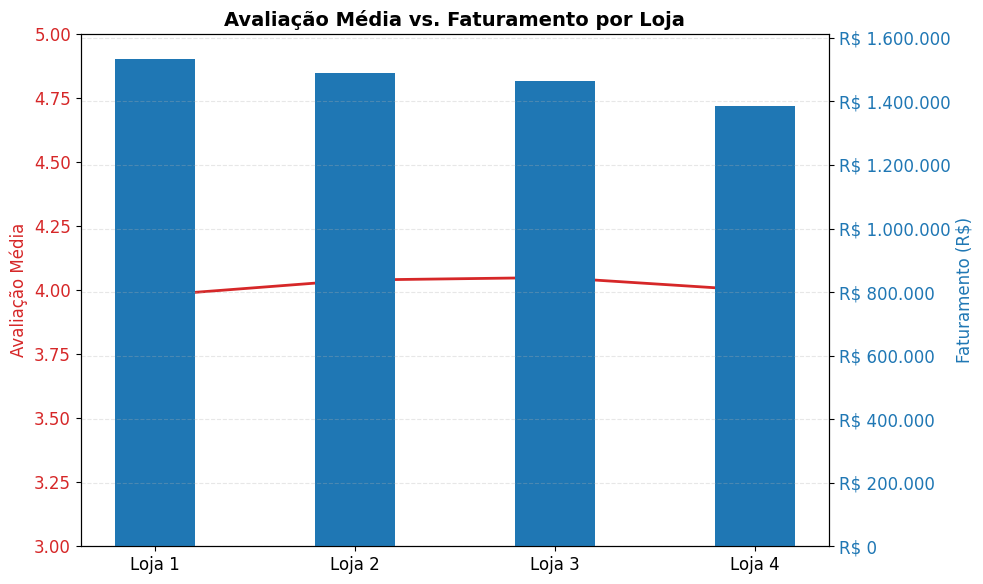

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
lojas = list(totais_por_loja.keys())
faturamentos = [totais_por_loja[loja]["faturamento"] for loja in lojas]

avaliacoes = [max(3, min(5, totais_por_loja[loja]["Média de Avaliação"])) for loja in lojas]

x = np.arange(len(lojas))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Criar gráfico
cor_avaliacao = '#d62728'
ax1.plot(x, avaliacoes, color=cor_avaliacao, marker='o', linewidth=2, label='Avaliação média')
ax1.set_ylabel('Avaliação Média', color=cor_avaliacao, fontsize=12)
ax1.tick_params(axis='y', labelcolor=cor_avaliacao)
ax1.set_ylim(3, 5)  # Limitar avaliação entre 3 a 5

ax2 = ax1.twinx()
cor_faturamento = '#1f77b4'
ax2.bar(x, faturamentos, color=cor_faturamento, width=0.4)
ax2.set_ylabel('Faturamento (R$)', color=cor_faturamento, fontsize=12)
ax2.tick_params(axis='y', labelcolor=cor_faturamento)

ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'R$ {x:,.0f}'.replace(',', '.')))

plt.xticks(x, lojas)
plt.title("Avaliação Média vs. Faturamento por Loja", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()




### **Análise final e conclusão **

A análise dos dados obtidos foi feita para avaliar qual das quatro lojas deveria ser vendida.
Os seguintes fatores foram analisados:
* O faturamento total das lojas:
    * A loja com menor faturamento é a Loja 4, embora não exista uma grande diferença entre os faturamentos das quatro lojas.
* As categorias de produtos mais vendidas:
    * As categorias mais vendidas são as mesmas nas quatro lojas, sem grandes variações entre as lojas.
* A média das avaliações de clientes por loja:
    * A Loja 1 tem a pior avaliação, seguida de perto pela Loja 4.
* Os produtos mais e menos vendidos:
    * Os produtos mais vendidos e menos vendidos variam bastante entre a lojas, mas os preços de tais produtos são similares.
* O frete médio de cada loja:
    * As porcentagens do frete médio em relação ao faturamento médio de cada loja são idênticas.

Existem algumas similaridades entre as lojas, mas o melhor critério para definição da loja deve ser o da performance, considerando-se os faturamentos e as avaliações das lojas.

Desta forma, a **Loja 4**, que tem o pior faturamento e a segunda pior avaliação, seria a loja recomendada para ser vendida.
